<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_DL/blob/main/CaiCai_DL_Week5.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
from torch import nn,optim
import matplotlib.pyplot as plt

import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/week4_function")
from torchLearning import *

##**一、Xavier方法处理sigmoid和tanh函数**

> 另外，一种更加严谨的、指代某一次传播过程上一层神经元数量和下一层神经元数量的叫法是扇入(fan in)和扇出(fan out)，由此Xavier方法中初始参数的方差也可写为$Var(w) =  \frac{2}{fan_{in}+fan_{out}}$。另外，Xavier在论文中所指出的，应该保持各层的激活值和梯度的方差在传播过程中保持一致，也被称为Glorot条件。

> 对于参数初始化计算过程，最重要的是确定参数的方差，如果是正态分布，由于均值是0，因此可以快速确定其分布，而如果是均匀分布，则可通过$bound = \sqrt{3var}$来确定分布区间$[-bound, bound]$。而在Xavier初始化方法中，$var = \frac{1}{fan_{avg}}$ ，其中$fan_{avg} = \frac{fan_{in}+fan_{out}}{2}$。

In [9]:
nn.init.xavier_uniform_ # (normal_同理)其中gain表示为增益系数，用于手动调整均匀分布的边界 


<function torch.nn.init.xavier_uniform_(tensor: torch.Tensor, gain: float = 1.0) -> torch.Tensor>

 $$a = \text{gain} \times \sqrt{\frac{6}{\text{fan_in} + \text{fan_out}}}$$

<center><font color="orange">$fan_{in}$由张量的列决定，$fan_{out}$由张量的行数决定

In [10]:
t = torch.arange(8).reshape(2,4).float()
t

tensor([[0., 1., 2., 3.],
        [4., 5., 6., 7.]])

In [15]:
nn.init.xavier_uniform_(t)

tensor([[ 0.3440, -0.6964,  0.4748, -0.5046],
        [ 0.4819,  0.9826, -0.8832,  0.6806]])

In [16]:
t

tensor([[ 0.3440, -0.6964,  0.4748, -0.5046],
        [ 0.4819,  0.9826, -0.8832,  0.6806]])

###**Sigmoid函数**

In [47]:
torch.manual_seed(420)

features,labels = tensorGenReg(w=[2,-1],bias=False,deg=2)

train_loader,test_loader = split_loader(features,labels)

lr = 0.03
num_epochs = 20

In [56]:
torch.manual_seed(420)

class sigmoid_class3(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4,n_hidden3=4,out_features=1,bias=True):       
        super(sigmoid_class3, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1,bias=bias)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2,bias=bias)
        self.linear3 = nn.Linear(n_hidden2, n_hidden3,bias=bias)
        self.linear4 = nn.Linear(n_hidden3, out_features,bias=bias) 
        
    def forward(self, x): 
      z1 = self.linear1(x)
      p1 = torch.sigmoid(z1)
      z2 = self.linear2(p1)
      p2 = torch.sigmoid(z2)
      z3 = self.linear3(p2)
      p3 = torch.sigmoid(z3)
      out = self.linear4(p3)
      return out
sigmoid_model3 = sigmoid_class3()
sigmoid_model3_init = sigmoid_class3()

for m in sigmoid_model3_init.modules():
  if isinstance(m,nn.Linear):
    nn.init.xavier_uniform_(m.weight)

model_l = [sigmoid_model3,sigmoid_model3_init]
name_l = ["sigmoid_model3","sigmoid_model3_init"]

In [ ]:
list(sigmoid_model3.parameters())

In [57]:
train_l,test_l = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    num_epochs=num_epochs,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

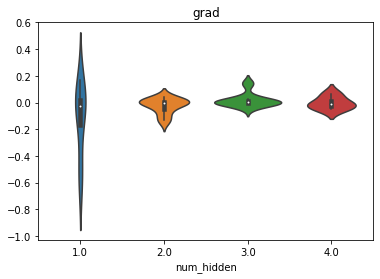

In [58]:
weights_vp(sigmoid_model3,att="grad")

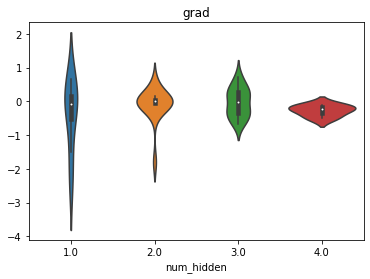

In [59]:
weights_vp(sigmoid_model3_init,att="grad")

Text(0.5, 1.0, 'mse_train')

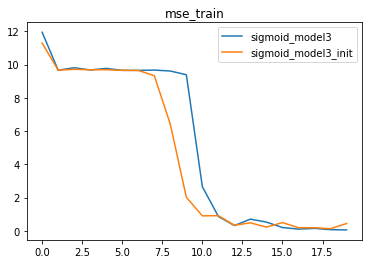

In [60]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),train_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_train")

Text(0.5, 1.0, 'mse_test')

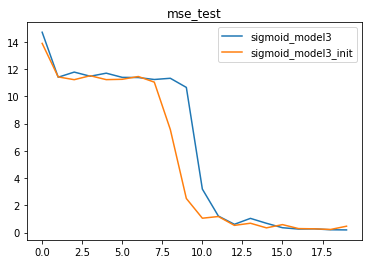

In [61]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),test_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_test")

In [62]:
torch.manual_seed(24)

class sigmoid_class4(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4,n_hidden3=4,n_hidden4=4,out_features=1,bias=True):       
        super(sigmoid_class4, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1,bias=bias)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2,bias=bias)
        self.linear3 = nn.Linear(n_hidden2, n_hidden3,bias=bias)
        self.linear4 = nn.Linear(n_hidden3, n_hidden4,bias=bias)
        self.linear5 = nn.Linear(n_hidden4, out_features,bias=bias) 
        
    def forward(self, x): 
      z1 = self.linear1(x)
      p1 = torch.sigmoid(z1)
      z2 = self.linear2(p1)
      p2 = torch.sigmoid(z2)
      z3 = self.linear3(p2)
      p3 = torch.sigmoid(z3)
      z4 = self.linear4(p3)
      p4 = torch.sigmoid(z4)
      out = self.linear5(p4)
      return out

sigmoid_model4 = sigmoid_class4()
sigmoid_model4_init = sigmoid_class4()

for m in sigmoid_model4_init.modules():
  if isinstance(m,nn.Linear):
    nn.init.xavier_uniform_(m.weight)

model_l = [sigmoid_model4,sigmoid_model4_init]
name_l = ["sigmoid_model4","sigmoid_model4_init"]

lr = 0.03
num_epochs = 40

train_l,test_l = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    num_epochs=num_epochs,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

Text(0.5, 1.0, 'mse_train')

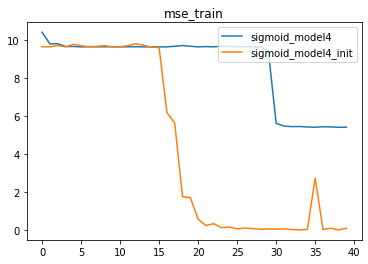

In [63]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),train_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_train")

Text(0.5, 1.0, 'mse_test')

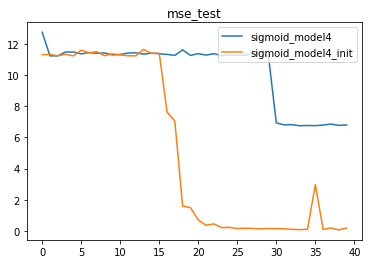

In [64]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),test_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_test")

###**Tanh函数**

In [92]:
torch.manual_seed(420)

features,labels = tensorGenReg(w=[2,-1],bias=False,deg=2)

train_loader,test_loader = split_loader(features,labels)

In [93]:
class tanh_class3(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4,n_hidden3=4,out_features=1,bias=True):       
        super(tanh_class3, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1,bias=bias)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2,bias=bias)
        self.linear3 = nn.Linear(n_hidden2, n_hidden3,bias=bias)
        self.linear4 = nn.Linear(n_hidden3, out_features,bias=bias) 
        
    def forward(self, x): 
      z1 = self.linear1(x)
      p1 = torch.tanh(z1)
      z2 = self.linear2(p1)
      p2 = torch.tanh(z2)
      z3 = self.linear3(p2)
      p3 = torch.tanh(z3)
      out = self.linear4(p3)
      return out

torch.manual_seed(24)
tanh_model3 = tanh_class3()
tanh_model3_init = tanh_class3()

for m in tanh_model3_init.modules():
  if isinstance(m,nn.Linear):
    nn.init.xavier_uniform_(m.weight)

model_l = [tanh_model3,tanh_model3_init]
name_l = ["tanh_model3","tanh_model3_init"]

lr = 0.03
num_epochs = 40

train_l,test_l = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    num_epochs=num_epochs,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

Text(0.5, 1.0, 'mse_train')

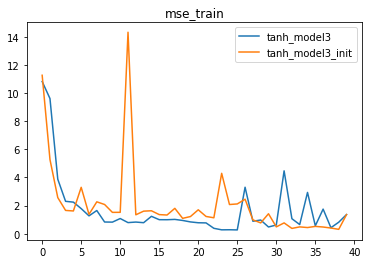

In [94]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),train_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_train")

Text(0.5, 1.0, 'mse_test')

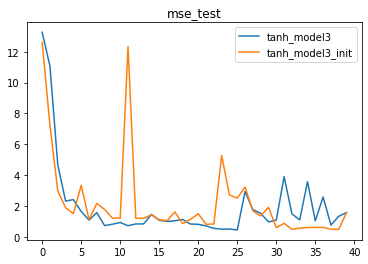

In [95]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),test_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_test")

In [77]:
torch.manual_seed(420)

features,labels = tensorGenReg(w=[2,-1],bias=False,deg=2)

train_loader,test_loader = split_loader(features,labels)

In [78]:
class tanh_class4(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4,n_hidden3=4,n_hidden4=4,out_features=1,bias=True):       
        super(tanh_class4, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1,bias=bias)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2,bias=bias)
        self.linear3 = nn.Linear(n_hidden2, n_hidden3,bias=bias)
        self.linear4 = nn.Linear(n_hidden3, n_hidden4,bias=bias)
        self.linear5 = nn.Linear(n_hidden4, out_features,bias=bias) 
        
    def forward(self, x): 
      z1 = self.linear1(x)
      p1 = torch.tanh(z1)
      z2 = self.linear2(p1)
      p2 = torch.tanh(z2)
      z3 = self.linear3(p2)
      p3 = torch.tanh(z3)
      z4 = self.linear4(p3)
      p4 = torch.tanh(z4)
      out = self.linear5(p4)
      return out

In [86]:
torch.manual_seed(24)
tanh_model4 = tanh_class4()
tanh_model4_init = tanh_class4()

for m in tanh_model4_init.modules():
  if isinstance(m,nn.Linear):
    nn.init.xavier_uniform_(m.weight)

model_l = [tanh_model4,tanh_model4_init]
name_l = ["tanh_model4","tanh_model4_init"]

lr = 0.03
num_epochs = 40

train_l,test_l = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    num_epochs=num_epochs,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

Text(0.5, 1.0, 'mse_train')

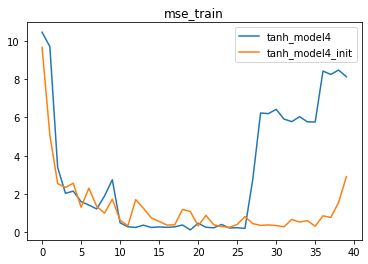

In [87]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),train_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_train")

Text(0.5, 1.0, 'mse_test')

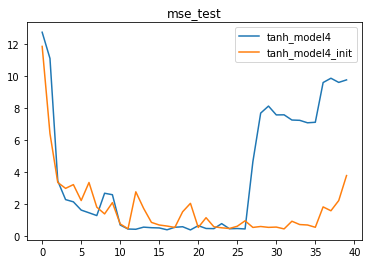

In [88]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),test_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_test")

<center>可能均匀分布会比高斯分布效果更好一点

##**二、Kaiming方法(HE初始化)**

&emsp;&emsp;当然，He初始化也遵循Glorot条件，即参数初始化结果要求正向传播时各层接收到的数据方差保持一致、反向传播时各层参数梯度的方差保持一致，不过由于每一层的激活值（激活函数输出结果）均值不为0，因此Xavier的数学推导过程不再成立。关于HE初始化的数学推导此处不进行深入讲解，感兴趣的同学可自行参考论文中给出的推导过程。需要知道的是，经过一系列的推导和论证之后，HE初始化仍然是规定参数是满足均值为0的随机变量，并且仍然借助均匀分布和高斯分布进行随机变量创建，不同的是Xavier中参数方差为：$$Var(w)_{Xavier} = \frac{2}{fan_{in}+fan_{out}}$$而HE初始化过程中，参数方差为<font color="orange">$$Var(w)_{HE} = \frac{2}{fan_{in}} 或 Var(w)_{HE} = \frac{2}{fan_{out}}$$</font>

也就是分子不变，分母取某层扇入或扇出的神经元的数量，同时论文中给出论证二者没有明显区别，建模过程中任取其一即可。

In [97]:
nn.init.kaiming_uniform_?

而实际上kaiming方法只有a的一个修正系数，实际公式如下：<font color="orange">$$bound = \sqrt{\frac{6}{(1+a^2)fan_{in}}}$$

In [98]:
t = torch.arange(12).reshape(2,6).float()
t

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

In [99]:
torch.manual_seed(420)
nn.init.kaiming_uniform_(t)

tensor([[ 0.6107, -0.6019,  0.9517, -0.7944, -0.3051, -0.6891],
        [ 0.7712,  0.3751, -0.4988, -0.7734, -0.5790, -0.1929]])

In [108]:
torch.manual_seed(420)

features,labels = tensorGenReg(w=[2,-1],bias=False,deg=2)

train_loader,test_loader = split_loader(features,labels)

lr=0.001
num_epochs=20

In [110]:
class relu_class3(nn.Module):                                   
    def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4,n_hidden3=4,out_features=1,bias=True):       
        super(relu_class3, self).__init__()
        self.linear1 = nn.Linear(in_features, n_hidden1,bias=bias)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2,bias=bias)
        self.linear3 = nn.Linear(n_hidden2, n_hidden3,bias=bias)
        self.linear4 = nn.Linear(n_hidden3, out_features,bias=bias) 
        
    def forward(self, x): 
      z1 = self.linear1(x)
      p1 = torch.relu(z1)
      z2 = self.linear2(p1)
      p2 = torch.relu(z2)
      z3 = self.linear3(p2)
      p3 = torch.relu(z3)
      out = self.linear4(p3)
      return out

torch.manual_seed(420)
relu_model3 = relu_class3()
relu_model3_init = relu_class3()

for m in relu_model3_init.modules():
  if isinstance(m,nn.Linear):
    nn.init.kaiming_uniform_(m.weight)

model_l = [relu_model3,relu_model3_init]
name_l = ["relu_model3","relu_model3_init"]

train_l,test_l = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    num_epochs=num_epochs,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

Text(0.5, 1.0, 'mse_train')

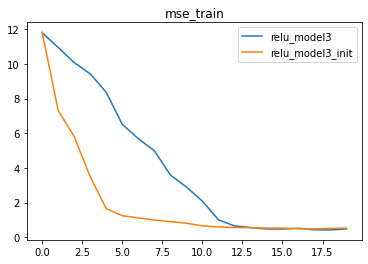

In [111]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),train_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_train")

Text(0.5, 1.0, 'mse_test')

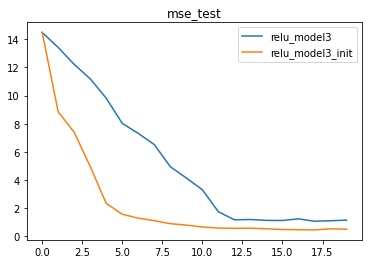

In [112]:
for i,name in enumerate(name_l):
  plt.plot(list(range(num_epochs)),test_l[i],label=name)
plt.legend(loc=1)
plt.title("mse_test")

<center><font color="orange">收敛速度会快很多